# 4. Representación de foto como valor singular

## Importando librerías necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import plotly.express as px
from PIL import Image

## Leyendo foto y vectorizandola

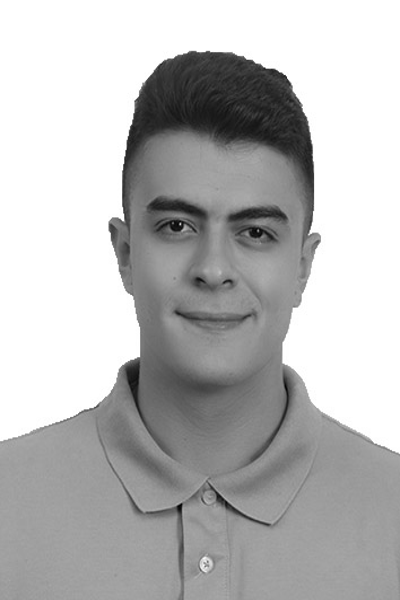

In [2]:
# Step 1: Load and preprocess the image
image = Image.open('data/IMG_1108.jpg').convert('L').resize((400, 600))  # Convert to grayscale

image
# Step 2: Flatten the image
#original_flat = np.array(image).flatten()

## Descompocisión en Valores Singulares (SVD) de la foto

In [3]:
U, S, Vt = np.linalg.svd(image, full_matrices=False)
print(U.shape, S.shape, Vt.shape)

(600, 400) (400,) (400, 400)


## Función para reconstruir la imagen en función del valor singular

In [4]:
def reconstruir_imagen(U, S, Vt, num_singular_values):
    # Mantener solo los primeros "num_singular_values" valores singulares
    S_truncado = np.diag(S[:num_singular_values])
    
    # Reconstruir la imagen con los valores singulares truncados
    imagen_reconstruida = np.dot(U[:, :num_singular_values], np.dot(S_truncado, Vt[:num_singular_values, :]))
    
    return imagen_reconstruida

## Función para reconstruir las imagenes y calcular la distancia por cada iteración

### Elección de métrica de distancia:

Aunque podríamos usar la ***norma euclidianda*** para medir la diferencia, esta se utiliza principalmente para medir la distancia entre vectores, no de matrices completas.

Por lo tanto, se elige la ***norma de frobenius*** dado que es la adecuada para medir la magnitud de la diferencia global entre dos matrices

In [9]:
# Lista para almacenar las distancias
distancias = []
tiempos = []


def optimize_picture(iteration,original_picture,start_time):
      # Marcar el tiempo de inicio
    
    imagen_reconstruida = reconstruir_imagen(U, S, Vt, iteration)
    distancia=np.linalg.norm(image-imagen_reconstruida, 'fro')
    distancias.append(distancia)

    elapsed_time = time.time() - start_time  # Calcular el tiempo transcurrido
    tiempos.append(elapsed_time)  # Almacenar el tiempo transcurrido en la lista

    if iteration <=10 or iteration % 50 == 0 or distancia <0.0000001:             
        print(f'Iteración {iteration}, Distancia forbenius {distancia:.2f}, Tiempo de ejecución acumulado {elapsed_time} ')   
        plt.figure()
        plt.imshow(imagen_reconstruida, cmap='gray')
        plt.title(f'Número de valores singulares = {iteration}')
        plt.axis('off')
        plt.show()
        

    # Convergence condition
    if distancia <0.0000001:
        return imagen_reconstruida

    # Recursively call the function
    return optimize_picture(iteration + 1, original_picture,start_time)

## Ejecutando la función

Iteración 0, Distancia forbenius 96503.61, Tiempo de ejecución acumulado 0.011643648147583008 


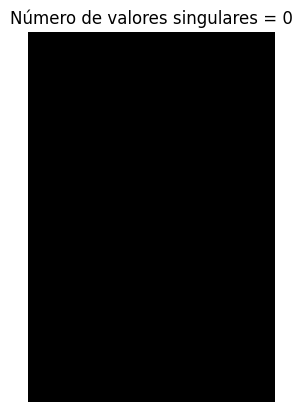

Iteración 1, Distancia forbenius 20673.60, Tiempo de ejecución acumulado 0.22751259803771973 


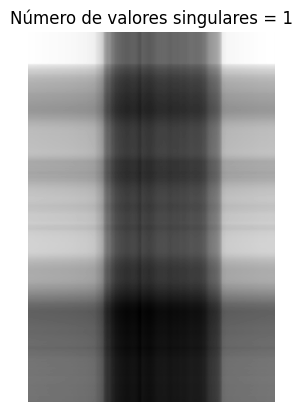

Iteración 2, Distancia forbenius 13431.09, Tiempo de ejecución acumulado 0.47686219215393066 


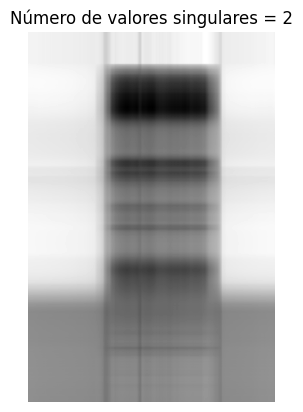

Iteración 3, Distancia forbenius 10549.97, Tiempo de ejecución acumulado 0.6994283199310303 


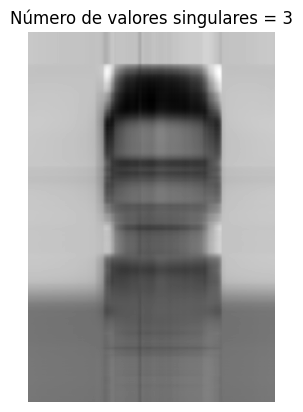

Iteración 4, Distancia forbenius 9511.58, Tiempo de ejecución acumulado 0.97519850730896 


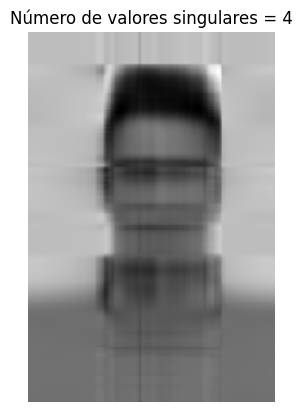

Iteración 5, Distancia forbenius 8655.28, Tiempo de ejecución acumulado 1.221498727798462 


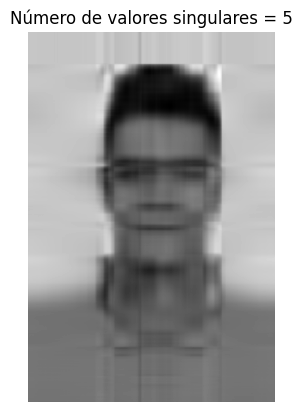

Iteración 6, Distancia forbenius 7901.09, Tiempo de ejecución acumulado 1.470916509628296 


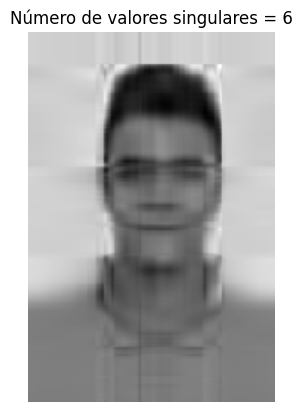

Iteración 7, Distancia forbenius 7217.06, Tiempo de ejecución acumulado 1.7412512302398682 


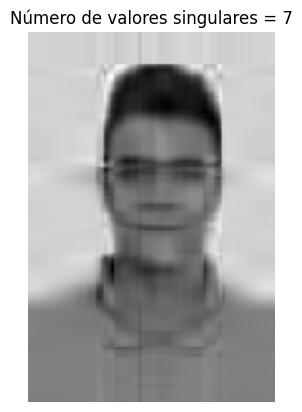

Iteración 8, Distancia forbenius 6683.97, Tiempo de ejecución acumulado 1.983867883682251 


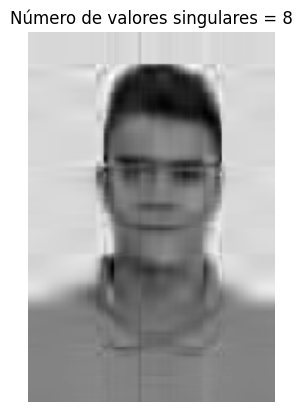

Iteración 9, Distancia forbenius 6287.37, Tiempo de ejecución acumulado 2.284344434738159 


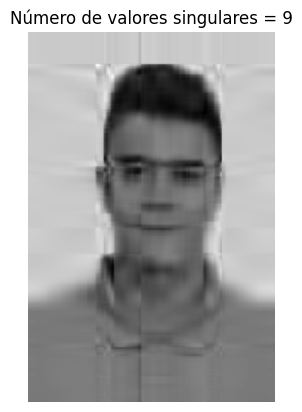

Iteración 10, Distancia forbenius 5917.73, Tiempo de ejecución acumulado 2.522270917892456 


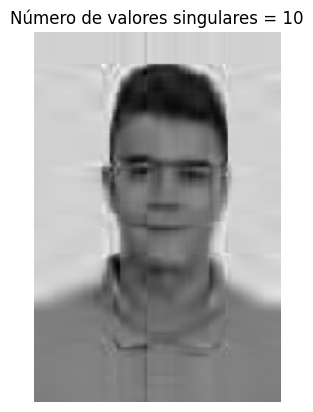

Iteración 50, Distancia forbenius 2055.03, Tiempo de ejecución acumulado 3.490312337875366 


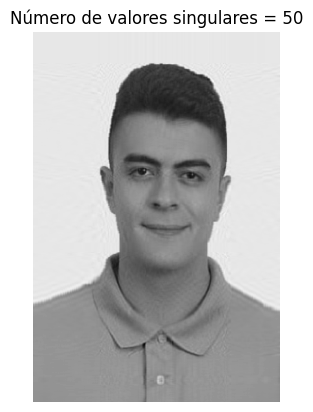

Iteración 100, Distancia forbenius 949.63, Tiempo de ejecución acumulado 4.143569231033325 


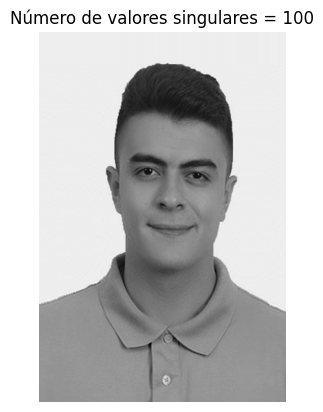

Iteración 150, Distancia forbenius 431.62, Tiempo de ejecución acumulado 5.683220863342285 


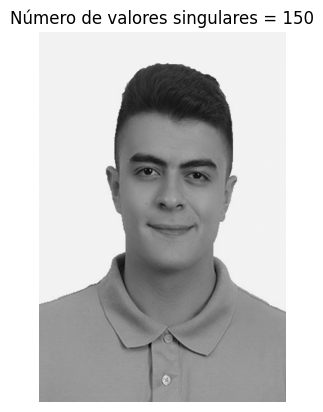

Iteración 200, Distancia forbenius 167.10, Tiempo de ejecución acumulado 6.595790147781372 


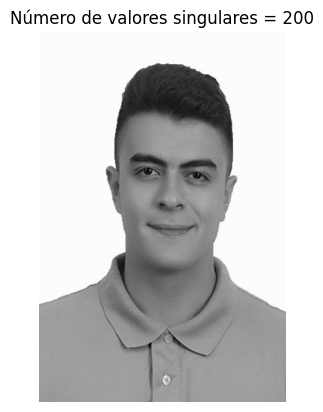

Iteración 250, Distancia forbenius 63.38, Tiempo de ejecución acumulado 7.524678707122803 


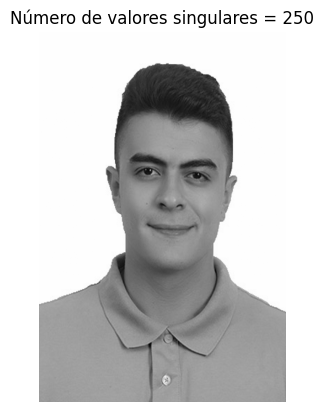

Iteración 300, Distancia forbenius 27.88, Tiempo de ejecución acumulado 8.294800519943237 


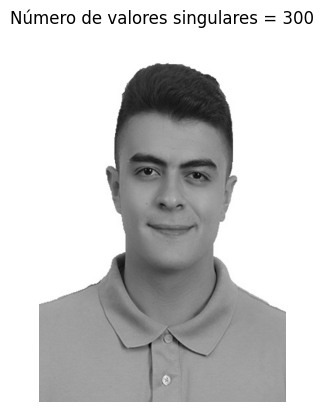

Iteración 350, Distancia forbenius 9.20, Tiempo de ejecución acumulado 9.743619918823242 


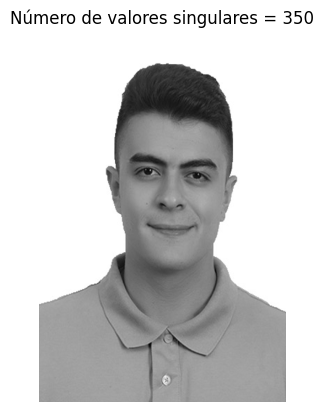

Iteración 400, Distancia forbenius 0.00, Tiempo de ejecución acumulado 10.887181997299194 


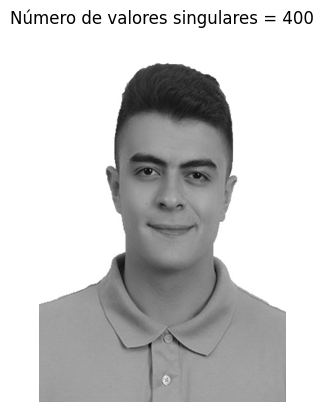

In [10]:
start_time = time.time()
foto_optimizada=optimize_picture(0,image,start_time)

## Analizando la distancia de la reconstrucción para cada número de valores singulares

In [11]:
data = pd.DataFrame({'Número de Valores Singulares': list(range(len(distancias))), 'Distancia': distancias})

# Crear el gráfico de dispersión
fig = px.line(data, x='Número de Valores Singulares', y='Distancia', markers=True,labels={'Distancia': 'Forbenius Distance'})

# Personalizar el gráfico si es necesario
fig.update_layout(
    title='Distancia de Forbenius vs Número de Valores Singulares',
    xaxis_title='Número de Valores Singulares',
    yaxis_title='Distancia Forbenius',
)

# Mostrar el gráfico
fig.show()

## Analizando el tiempo de la reconstrucción para cada número de valores singulares

In [12]:
data = pd.DataFrame({'Número de Valores Singulares': list(range(len(tiempos))), 'Tiempo de ejecución acumulado': tiempos})

# Crear el gráfico de dispersión
fig = px.line(data, x='Número de Valores Singulares', y='Tiempo de ejecución acumulado', markers=True)

# Personalizar el gráfico si es necesario
fig.update_layout(
    title='Tiempo de Ejecución acumulado vs Número de Valores Singulares',
    xaxis_title='Número de Valores Singulares',
    yaxis_title='Tiempo de Ejecución Acumulado',
)

# Mostrar el gráfico
fig.show()

# Conclusión

#### La elección de un corte óptimo para el número de valores singulares mayores, depende del contexto en el que se esté trabajando. Esto se debe a que siempre la distancia mínima va a ser cuando el número de valores singulares sea igual al total de valores singulares posibles, sin embargo, dado que esto es un proceso iterativo, es posible que computacionalmente no sea eficiente.

#### Se puede identificar que a partir de 100 valores singulares mayores, la diferencia calculada en norma de frobenius es menor a 1000 unidades, y el tiempo de ejecución acumulado es razonable.

#### Sin embargo, analizando el tiempo de ejecución acumulado, se podría intuir que la función no es computacionalmente ineficiente dado que no tiene un crecimiento lineal.
